# Monte Carlo Simulation 
### designed to analyze the output CSV files generated by C++ cellular automata simulation, where each file represents the state of the simulation at a particular timestep

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
def read_csv_files_sorted(folder_path):
    # List and sort file names in the specified folder
    list_of_file_names = os.listdir(folder_path)
    list_of_file_names.sort(key=lambda f: int(f.split('.')[0]))
    if list_of_file_names[0] == "-1.csv":
        list_of_file_names.pop()

    
    # Read CSV files in sorted order
    
    csv_dataframes = [np.loadtxt(os.path.join(folder_path, file_name), delimiter=",", dtype=int) for file_name in list_of_file_names if file_name.endswith('.csv')]

    return csv_dataframes

In [3]:
import numpy as np
arr = np.loadtxt("./Data/-1.csv", delimiter=",", dtype=int)
display(arr)

(arr == 1).sum()

array([[2, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 2, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

23

In [8]:
def monte_carlo_simulation(csv_data_frames, num_simulations):
    # Perform Monte Carlo simulations
    results = []
    for _ in range(num_simulations):
        # Randomly select a csv file (a state of the simulation at a specific timestep)
        random_csv = csv_data_frames[np.random.randint(0, len(csv_data_frames))]

        # State counting- count number of cells in a particular state                             
  
        count = (random_csv == 2).sum()  # state of interest, change based on interest
                                                        # count is result of computtion for iteration of MC simulation 
                                                         # count, how many people got sick?
        results.append(count)
        # counts are collected across all iterations of MC simulation 
    return results 

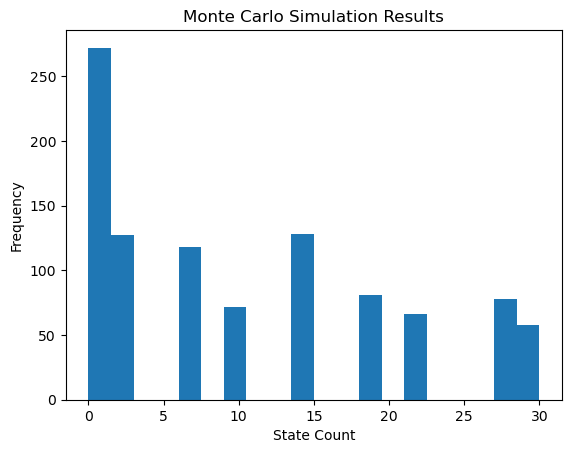

In [9]:
# Histogram to display the distribution of the counts: 
# how frequently different counts of the specified state occur across the MC simulations
def visualize_results(results):
    # Visualize results of Monte Carlo simulation
    plt.hist(results, bins=20)
    plt.xlabel('State Count')
    plt.ylabel('Frequency')
    plt.title('Monte Carlo Simulation Results')
    plt.show()

# Expecting a wide distribution based on the variability of states across different time steps of the CA simulation 

# Execute 
folder_path = './Data/'
num_simulations = 1000  # number of simulations

csv_data_frames = read_csv_files_sorted(folder_path)
simulation_results = monte_carlo_simulation(csv_data_frames, num_simulations)
visualize_results(simulation_results)